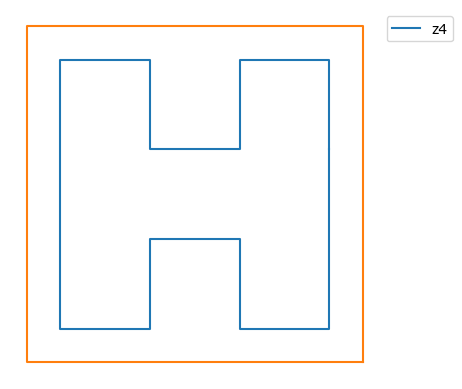

(1.75, 8.0, 0.7463526651802308, 112.0, 113.0)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
def show_plot():
  ax=plt.gca()
  ax.set_aspect('equal')
  ax.set_axis_off()
  plt.show()
  plt.close()
def  hilbert(n):
  a=1+1j
  b=np.conj(a)
  z=np.array([0])
  for k in range(n):
    w=1j*np.conj(z)
    z=np.concatenate([w-a,z-b,z+a,b-w])/2.0
  return z
def moore(n):
  z=-np.conj(hilbert(n))
  w=np.concatenate([z+1+1j,z-1+1j])
  return np.concatenate([w,-1.0*w])/2.0
def area_length(x):
  deltax=np.roll(x,-1)-x
  area=sum(np.conj(x)*deltax).imag/2.0#the cross product
  length=sum(abs(deltax))
  return (area,length)
z4=moore(1)
plt.plot((*z4.real,z4[0].real),(*z4.imag,z4[0].imag),label='z4')
a4,l4=area_length(z4)
r4=(a4/np.pi)**0.5
l=(a4*2)**0.5/2
plt.plot((l,l,-l,-l,l),(-l,l,l,-l,-l))
plt.legend(bbox_to_anchor=(1.0,1.0),loc='upper left')
show_plot()
a4,l4,r4,a4/0.125**2,15**2-a4/0.125**2

In [2]:
n=8
zu=np.concatenate([[z4[i-1]*(n-k)+z4[i]*k for k in range(1,n+1)] for i in range(len(z4))])/n
zu=np.roll(zu,-n//2+1)
zuf=np.fft.fft(zu)
rcos=(0.5*(1+np.cos(np.pi*2*np.array(list(range(len(zu))))/len(zu))))
rzu=r4*len(zu)
zuf[1]-=rzu
zuff=zuf*rcos**np.exp(2)
zuff[1]+=rzu
zk=np.fft.ifft(zuff)

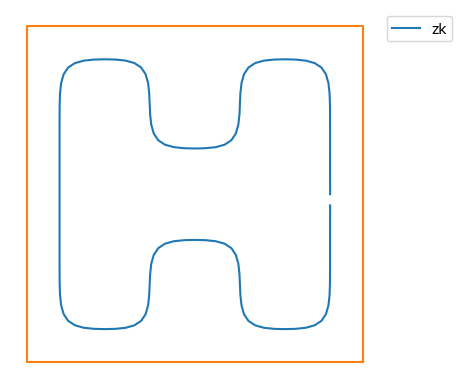

(1.7359228061943617, 7.114555121209216)


In [3]:
plt.plot(zk.real,zk.imag,label='zk')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.plot((l,l,-l,-l,l),(-l,l,l,-l,-l))
show_plot()
print(area_length(zk))

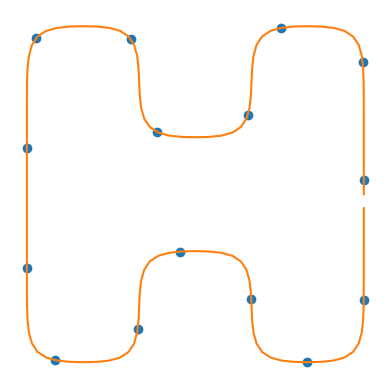

In [4]:
def ift(t,a,f=None):
  n=len(a)
  n_2=n//2
  if f is None:
    f=np.roll(np.arange(-n_2,n-n_2),n-n_2)
  f=f.reshape((-1,1))
  return np.sum(a.reshape((-1,1))*np.exp(1j*2*np.pi*f*t),axis=0)/n
t=np.arange(1/128,1.0,1/15)
x=ift(t,zuff)
plt.plot(x.real,x.imag,'o')
plt.plot(zk.real,zk.imag)
show_plot()

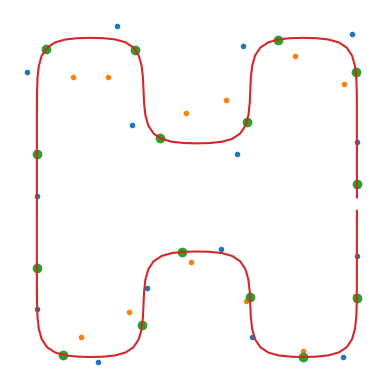

In [5]:
def ift_(t,a,f=None):
  n=len(a)
  n_2=n//2
  if f==None:
    f=np.roll(np.arange(-n_2,n-n_2),n-n_2)
    f=f.reshape((-1,1))
  return np.sum(a.reshape((-1,1))*1.0j*2*np.pi*f*np.exp(1j*2*np.pi*f*t),axis=0)/n
def ift__(t,a,f=None):
  n=len(a)
  n_2=n//2
  if f==None:
    f=np.roll(np.arange(-n_2,n-n_2),n-n_2)
  f=f.reshape((-1,1))
  return np.sum(a.reshape((-1,1))*(1.0j*2*np.pi*f)**2*np.exp(1j*2*np.pi*f*t),axis=0)/n
x_=ift_(t,zuff)/(len(zk))*np.pi
x__=ift__(t,zuff)/(len(zk)**2)*10
plt.plot(x.real+x_.real,x.imag+x_.imag,'.')
plt.plot(x.real+x__.real,x.imag+x__.imag,'.')
plt.plot(x.real,x.imag,'o')
plt.plot(zk.real,zk.imag)
show_plot()

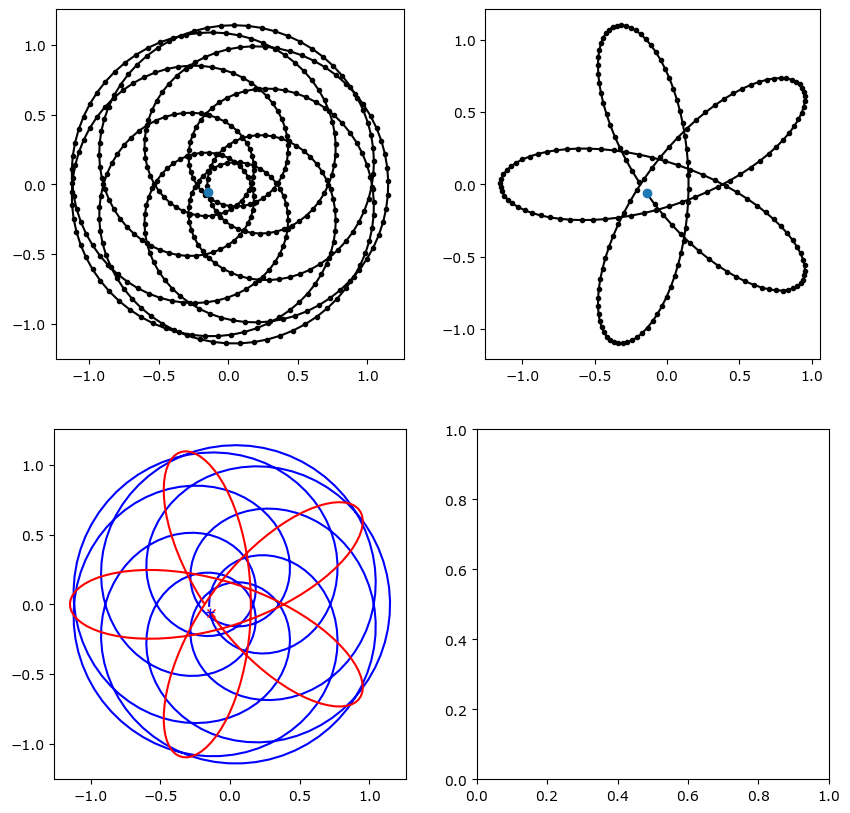

In [6]:
x1=ift(np.arange(0,1,1/500),np.array([1*1j**(0.35/9),1.3*1j**(2+0.35/4)]),np.array([4,9]))
x2=ift(np.arange(0,1,1/200),np.array([1j**(+2-4.76/3),1.3*1j**(0+4.76/2)]),np.array([-2,3]))
fig,((ax1,ax2),(ax3,_))=plt.subplots(2,2,figsize=(10,10))
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')
ax1.plot(x1.real,x1.imag,'k.-');
ax1.plot(x1[0].real,x1[0].imag,'o') 
ax2.plot(x2.real,x2.imag,'k.-')
ax2.plot(x2[0].real,x2[0].imag,'o')
ax3.plot(x1.real,x1.imag,'b-');
ax3.plot(x1[0].real,x1[0].imag,'b+',zorder=7)  
ax3.plot(x2.real,x2.imag,'r-')
ax3.plot(x2[0].real,x2[0].imag,'rx',zorder=5)  

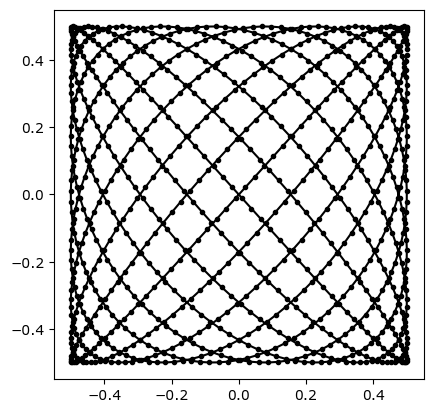

In [7]:
x=ift(np.arange(0,1,1/1000),np.array([1j**(0/90),1j**(0/90),1j**((90-30)/90),1j**((90+30)/90)]),np.array([9,-9,10,-10]))
plt.gca().set_aspect('equal')
plt.plot(x.real,x.imag,'k.-');